In [7]:
# Import libraries
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create noise and score vectors
noiseVector = np.arange(0, 110, 10)
rScoreDifference = []
rTrainingList = []
rTestingList = []

In [9]:
for i in noiseVector:
    X, T = make_regression(100, 5, n_targets=2, shuffle=True, bias=0, noise=i, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.3, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    
    rTraining = r2_score(y_train, reg.predict(X_train))
    rTesting = r2_score(y_test, reg.predict(X_test))

    rTrainingList.append(rTraining)
    rTestingList.append(rTesting)
    
    rScoreDifference.append(abs(rTesting - rTraining))

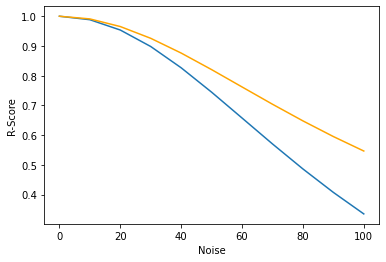

In [10]:
plt.xlabel("Noise")
plt.ylabel("R-Score")

plt.plot(noiseVector, rTestingList)
plt.plot(noiseVector, rTrainingList, color="orange")

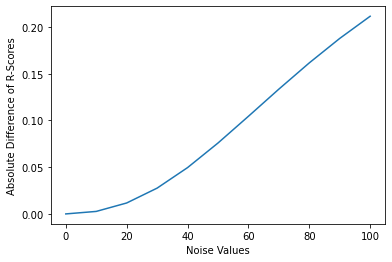

In [11]:
plt.xlabel("Noise Values")
plt.ylabel("Absolute Difference of R-Scores")
plt.plot(noiseVector, rScoreDifference)

In [12]:
# Split data using https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split